## Card Fraud Detection 

In this project I focus on credit card fraud detection using Logist Regression Method.

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

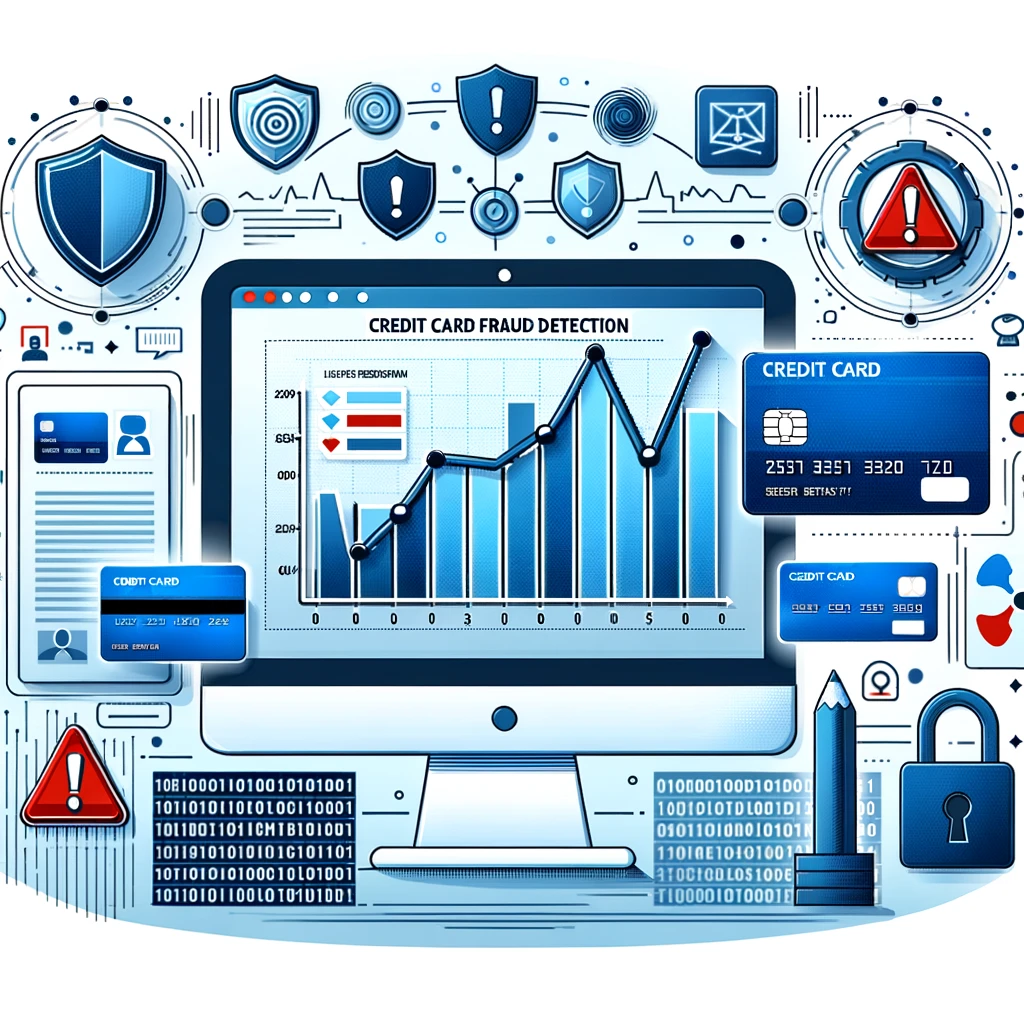
Picture generated by DALL-E.

## Imports and data preprocessing

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv('./Data/creditcard.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values, thanks this we can finish preprocessing section.

## Basic Analysis

In [13]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

That means that 284315 transactions were legit and 492 were a fraud.

In [16]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

Below mean values of each category for legit and fraud class.

In [19]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Due to the large difference in numbers between the legit and fraud classes,
I use the under-sampling method to prevent models from making decisions based on significant bias. 

In [24]:
legit_sample = legit.sample(n=492)
new_data = pd.concat([legit_sample, fraud], axis=0)
new_data.shape

(984, 31)

In [25]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97580.221545,-0.030156,-0.054987,-0.041268,0.089821,-0.079688,-0.023643,0.126389,0.034446,0.023424,...,-0.007154,0.005664,0.023241,-0.030163,0.036408,-0.006135,-0.015855,0.018226,-0.036022,106.817846
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Class of each transaction is a result. So now I split data into X (Input) and Y (output).

In [28]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

Now I will split data into training and testing samples.

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the model:

In [38]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Accurency of train data.

In [43]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)

0.9580686149936467


Accurency of test data

In [44]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(testing_data_accuracy)

0.9289340101522843


Accorency of testing data 0.93 while accorency of training data 0.95. That means that this model is not overfitted or underfitted.


Below I add the imporatnce of each feature.

In [46]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

   Feature  Coefficient  Absolute_Coefficient
14     V14    -1.510329              1.510329
8       V8    -0.829016              0.829016
28     V28     0.783001              0.783001
12     V12    -0.754989              0.754989
4       V4     0.737510              0.737510
16     V16    -0.664841              0.664841
24     V24     0.644094              0.644094
17     V17    -0.640469              0.640469
20     V20    -0.637745              0.637745
26     V26    -0.629445              0.629445
10     V10    -0.618613              0.618613
5       V5     0.559468              0.559468
21     V21    -0.545917              0.545917
6       V6    -0.524352              0.524352
19     V19     0.513590              0.513590
27     V27     0.439013              0.439013
22     V22     0.436314              0.436314
13     V13    -0.419016              0.419016
9       V9    -0.362314              0.362314
7       V7    -0.343525              0.343525
11     V11     0.307587           